In [5]:
from __future__ import division
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange #导入拉格朗日插值函数
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

# 缺失值处理——拉格朗日插值法

In [8]:
inputfile = './data/catering_sale.xls' #销量数据路径
outputfile = './data/sales.xls' #输出数据路径
#inputfile = 'D:/wenting/Learn_Python/6/data/catering_sale.xls' #销量数据路径
#outputfile = 'D:\wenting\ts\Learn_Python\6/data/sales.xls' #输出数据路径


In [9]:
data = pd.read_excel(inputfile) #读入数据
data[(data["销量"] < 400)]

,日期,销量
0,2015-03-01,51.0
103,2014-11-08,22.0
110,2014-11-01,60.0


In [10]:
data[(data["销量"] > 5000)]

,日期,销量
8,2015-02-21,6607.40
144,2014-09-27,9106.44


In [11]:
 data["销量"][(data["销量"] < 400) | (data["销量"] > 5000)] = None #过滤异常值，将其变为空值

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
data[(data["销量"] < 400)] 

,日期,销量


In [13]:
data[(data["销量"] > 5000)]

,日期,销量


## 自定义列向量拉格朗日插值函数

In [14]:
#s为列向量，n为被插值的位置，k为取前后的数据个数，默认为5
def ployinterp_column(s, n, k=5):
  y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))] #取数
  y = y[y.notnull()] #剔除空值
  return lagrange(y.index, list(y))(n) #插值并返回插值结果


In [15]:
p = DataFrame({'lkey': range(7),
                 'data1': range(7)})
p


,data1,lkey
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6


In [16]:
p['data1'][(0)] = None
p['lkey'][(1)] = None


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
p

,data1,lkey
0,NaN,0.0
1,1.0,NaN
2,2.0,2.0
3,3.0,3.0
4,4.0,4.0
5,5.0,5.0
6,6.0,6.0


In [18]:
 def ploy_column(s, n, k=5):
        y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))] #取数
        y = y[y.notnull()] #剔除空值
        print("[list(range(n-k, n): ",list(range(n-k, n)),"list(range(n+1, n+1+k)): ",list(range(n+1, n+1+k)))
        y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))] #取数
        print("y",y)
        print("y.notnull()",y.notnull())
        y = y[y.notnull()] #剔除空值
        print("y(notnull)",y)
        print("y.index",y.index)
        print("n:",n)
        print("y.index",y.index)
        print("list(y))",list(y))
        print("final return")
        print(lagrange(y.index, list(y))(n))
        return(lagrange(y.index, list(y))(n))

# lagrange

lagrange(x,w)中两个主要的参数（x，w），把一系列点当成是函数关系y=f（x）

其中x对应参数x，而y对应为w。输出结果为函数f，根据函数可以求出对应x对应的y

In [19]:
for i in p.columns:
  for j in range(len(p)):
    if (p[i].isnull())[j]: #如果为空即插值。
        p[i][j] = ploy_column(p[i], j)

C:\Anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


[list(range(n-k, n):  [-5, -4, -3, -2, -1] list(range(n+1, n+1+k)):  [1, 2, 3, 4, 5]
y -5    NaN
-4    NaN
-3    NaN
-2    NaN
-1    NaN
 1    1.0
 2    2.0
 3    3.0
 4    4.0
 5    5.0
Name: data1, dtype: float64
y.notnull() -5    False
-4    False
-3    False
-2    False
-1    False
 1     True
 2     True
 3     True
 4     True
 5     True
Name: data1, dtype: bool
y(notnull) 1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
Name: data1, dtype: float64
y.index Int64Index([1, 2, 3, 4, 5], dtype='int64')
n: 0
y.index Int64Index([1, 2, 3, 4, 5], dtype='int64')
list(y)) [1.0, 2.0, 3.0, 4.0, 5.0]
final return
0.0
[list(range(n-k, n):  [-4, -3, -2, -1, 0] list(range(n+1, n+1+k)):  [2, 3, 4, 5, 6]
y -4    NaN
-3    NaN
-2    NaN
-1    NaN
 0    0.0
 2    2.0
 3    3.0
 4    4.0
 5    5.0
 6    6.0
Name: lkey, dtype: float64
y.notnull() -4    False
-3    False
-2    False
-1    False
 0     True
 2     True
 3     True
 4     True
 5     True
 6     True
Name: lkey, dtype: bool
y(notnull) 0    

In [20]:
p

,data1,lkey
0,0.0,0.0
1,1.0,1.0
2,2.0,2.0
3,3.0,3.0
4,4.0,4.0
5,5.0,5.0
6,6.0,6.0


In [21]:

#逐个元素判断是否需要插值
for i in data.columns:
  for j in range(len(data)):
    if (data[i].isnull())[j]: #如果为空即插值。
      data[i][j] = ployinterp_column(data[i], j)

data.to_excel(outputfile) #输出结果，写入文件

C:\Anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
data[0:5]

,日期,销量
0,2015-03-01,-291.4
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1


# data.frame合并

## 1

In [23]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
print("df1","\n",df1)
print("df2","\n",df2)

merge = pd.merge(df1, df2) # 选取交集合并，行数不一致时自动填充
key = pd.merge(df1, df2, on='key')
print("merge","\n",merge)
print("key","\n",key)

df1 
    data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b
df2 
    data2 key
0      0   a
1      1   b
2      2   d
merge 
    data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
key 
    data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0


## 2

In [24]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})

print("df3","\n",df3)
print("df4","\n",df4)

rkey = pd.merge(df3, df4, left_on='lkey', right_on='rkey') 
# 默认inner取交集
outer = pd.merge(df1, df2, how='outer') 
# outer取并集

print("merge-left_on=\'lkey', right_on='rkey\'","\n",rkey)
print("merge-outer","\n",outer)

df3 
    data1 lkey
0      0    b
1      1    b
2      2    a
3      3    c
4      4    a
5      5    a
6      6    b
df4 
    data2 rkey
0      0    a
1      1    b
2      2    d
merge-left_on='lkey', right_on='rkey' 
    data1 lkey  data2 rkey
0      0    b      1    b
1      1    b      1    b
2      6    b      1    b
3      2    a      0    a
4      4    a      0    a
5      5    a      0    a
merge-outer 
    data1 key  data2
0    0.0   b    1.0
1    1.0   b    1.0
2    6.0   b    1.0
3    2.0   a    0.0
4    4.0   a    0.0
5    5.0   a    0.0
6    3.0   c    NaN
7    NaN   d    2.0


## 3

In [25]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})
print("df1","\n",df1)
print("df2","\n",df2)

left = pd.merge(df1, df2, on='key', how='left')
# 只用key中的index_intersection（preserve left dataframe's（df1） key order）
inner = pd.merge(df1, df2, how='inner')
# 取交集

print("merge-left","\n",left)
print("merge-inner","\n",inner)

df1 
    data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   b
df2 
    data2 key
0      0   a
1      1   b
2      2   a
3      3   b
4      4   d
merge-left 
     data1 key  data2
0       0   b    1.0
1       0   b    3.0
2       1   b    1.0
3       1   b    3.0
4       2   a    0.0
5       2   a    2.0
6       3   c    NaN
7       4   a    0.0
8       4   a    2.0
9       5   b    1.0
10      5   b    3.0
merge-inner 
    data1 key  data2
0      0   b      1
1      0   b      3
2      1   b      1
3      1   b      3
4      5   b      1
5      5   b      3
6      2   a      0
7      2   a      2
8      4   a      0
9      4   a      2


## 4

In [26]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})

print("left","\n",left)
print("right","\n",right)

merge_outer = pd.merge(left, right, on=['key1', 'key2'], how='outer')
# 取key1和key2同时存在的交集

print("merge-key1&key2-outer","\n",merge_outer)

left 
   key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3
right 
   key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7
merge-key1&key2-outer 
   key1 key2  lval  rval
0  foo  one   1.0   4.0
1  foo  one   1.0   5.0
2  foo  two   2.0   NaN
3  bar  one   3.0   6.0
4  bar  two   NaN   7.0


# 索引上的合并

## 1

In [27]:

left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
print("left1","\n",left1)
print("right1","\n",right1)

right_inner = pd.merge(left1, right1, left_on='key', right_index=True)

right_outer = pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

print("right_inner","\n",right_inner)
print("right_outer","\n",right_outer)

left1 
   key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
right1 
    group_val
a        3.5
b        7.0
right_inner 
   key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
right_outer 
   key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN


## 2

In [28]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
lefth

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


In [29]:
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])

righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [30]:
# 交集
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


In [31]:
# 并集
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


In [32]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [33]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [34]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


## 3

In [35]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [36]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


## 4

In [37]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [38]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


# 轴向连接
## 1

In [39]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [40]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

## 2

In [41]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [42]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [43]:
s4 = pd.concat([s1 * 5, s3])
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [44]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [45]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


## 3

In [46]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [47]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


## 4

In [48]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [49]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [50]:
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])
df2

,three,four
a,5,6
c,7,8


In [51]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [52]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [53]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [54]:
#5
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])

df1

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221


In [55]:
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

df2

,b,d,a
0,0.274992,0.228913,1.352917
1,0.886429,-2.001637,-0.371843


In [56]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,1.352917,0.274992,NaN,0.228913
4,-0.371843,0.886429,NaN,-2.001637


# 合并重叠数据
## 1

In [57]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [58]:
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [59]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

## 2

In [60]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

## 3

In [61]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [62]:
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [63]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


# 重塑层次化索引
## 1

In [64]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [65]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [66]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [67]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [68]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


## 2

In [69]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s1

a    0
b    1
c    2
d    3
dtype: int64

In [70]:
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
s2

c    4
d    5
e    6
dtype: int64

In [71]:
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [72]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [73]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [74]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

## 3

In [75]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [76]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [77]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

# 长宽格式的转换
## 1

In [78]:
data = pd.read_csv('.\data\macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [79]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [80]:
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))
data.head()

item,realgdp,infl,unemp
date,,,
1959-03-31,2710.349,0.00,5.8
1959-06-30,2778.801,2.34,5.1
1959-09-30,2775.488,2.74,5.3
1959-12-31,2785.204,0.27,5.6
1960-03-31,2847.699,2.31,5.2


In [81]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})
ldata.head()

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340


In [82]:
wdata = ldata.pivot('date', 'item', 'value')
wdata.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


## 2

In [83]:
ldata[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [84]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [85]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,1.669025
1,1959-03-31,infl,0.000,-0.438570
2,1959-03-31,unemp,5.800,-0.539741
3,1959-06-30,realgdp,2778.801,0.476985
4,1959-06-30,infl,2.340,3.248944
5,1959-06-30,unemp,5.100,-1.021228
6,1959-09-30,realgdp,2775.488,-0.577087
7,1959-09-30,infl,2.740,0.124121
8,1959-09-30,unemp,5.300,0.302614
9,1959-12-31,realgdp,2785.204,0.523772


In [86]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.438570  1.669025 -0.539741
1959-06-30  2.34  2778.801   5.1  3.248944  0.476985 -1.021228
1959-09-30  2.74  2775.488   5.3  0.124121 -0.577087  0.302614
1959-12-31  0.27  2785.204   5.6  0.000940  0.523772  1.343810
1960-03-31  2.31  2847.699   5.2 -0.831154 -0.713544 -2.370232

In [87]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [89]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.438570  1.669025 -0.539741
1959-06-30  2.34  2778.801   5.1  3.248944  0.476985 -1.021228
1959-09-30  2.74  2775.488   5.3  0.124121 -0.577087  0.302614
1959-12-31  0.27  2785.204   5.6  0.000940  0.523772  1.343810
1960-03-31  2.31  2847.699   5.2 -0.831154 -0.713544 -2.370232
1960-06-30  0.14  2834.390   5.2 -0.860757 -1.860761  0.560145
1960-09-30  2.70  2839.022   5.6  0.119827 -1.265934 -1.063512

# 移除重复数据

In [98]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [91]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [92]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [93]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [97]:
data.drop_duplicates(['k1', 'k2'], inplace=True)
data

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


# 利用函数或映射进行数据转换
## 1

In [99]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [100]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [101]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

# 数据标准化

In [102]:
datafile = './data/normalization_data.xls' #参数初始化
data = pd.read_excel(datafile, header = None) #读取数据
data

,0,1,2,3
0,78,521,602,2863
1,144,-600,-521,2245
2,95,-457,468,-1283
3,69,596,695,1054
4,190,527,691,2051
5,101,403,470,2487
6,146,413,435,2571


In [104]:
(data - data.min()) / (data.max() - data.min()) #最小-最大规范化

,0,1,2,3
0,0.074380,0.937291,0.923520,1.000000
1,0.619835,0.000000,0.000000,0.850941
2,0.214876,0.119565,0.813322,0.000000
3,0.000000,1.000000,1.000000,0.563676
4,1.000000,0.942308,0.996711,0.804149
5,0.264463,0.838629,0.814967,0.909310
6,0.636364,0.846990,0.786184,0.929571


In [105]:
(data - data.mean()) / data.std() #零-均值规范化

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


In [106]:
data/10**np.ceil(np.log10(data.abs().max())) #小数定标规范化

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


# 替换值

In [107]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [108]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [109]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [110]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [111]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [112]:
###重命名轴索引
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

data.index.map(str.upper)

data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [113]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [114]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [115]:
# 总是返回DataFrame的引用
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


# 离散化与面元划分
## 1

In [116]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [117]:
cats.labels

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [119]:
cats.labels

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [120]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [121]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [122]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [88]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

## 2

In [124]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
cats

[(-0.0218, 0.686], (-3.429, -0.675], (0.686, 2.654], (-0.675, -0.0218], (-0.675, -0.0218], ..., (-0.0218, 0.686], (-0.0218, 0.686], (0.686, 2.654], (-0.0218, 0.686], (-3.429, -0.675]]
Length: 1000
Categories (4, interval[float64]): [(-3.429, -0.675] < (-0.675, -0.0218] < (-0.0218, 0.686] < (0.686, 2.654]]

In [125]:
pd.value_counts(cats)

(0.686, 2.654]       250
(-0.0218, 0.686]     250
(-0.675, -0.0218]    250
(-3.429, -0.675]     250
dtype: int64

In [126]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-0.0218, 1.323], (-3.429, -1.324], (-0.0218, 1.323], (-1.324, -0.0218], (-1.324, -0.0218], ..., (-0.0218, 1.323], (-0.0218, 1.323], (-0.0218, 1.323], (-0.0218, 1.323], (-3.429, -1.324]]
Length: 1000
Categories (4, interval[float64]): [(-3.429, -1.324] < (-1.324, -0.0218] < (-0.0218, 1.323] < (1.323, 2.654]]

# 检测和过滤异常值
## 1

In [127]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

In [129]:
col = data[3]
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [130]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


# 2

In [131]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


# 排列与随机采样
## 1

In [134]:
df = DataFrame(np.arange(5 * 4).reshape((5, 4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [135]:
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

In [136]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


## 2

In [138]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


## 3

In [139]:
bag = np.array([5, 7, -1, 6, 4])
bag

array([ 5,  7, -1,  6,  4])

In [140]:
sampler = np.random.randint(0, len(bag), size=10)
sampler

array([4, 4, 2, 2, 2, 0, 3, 0, 4, 1])

In [141]:
draws = bag.take(sampler) #sample的第一个数4是index，取bag中的第五个值4,
draws

array([ 4,  4, -1, -1, -1,  5,  6,  5,  4,  7])

# 计算指标与哑变量
## 1

In [142]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [144]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [146]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [147]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


## 2

In [150]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('./data/movies.dat', sep='::', header=None,
                        names=mnames)
movies[:10]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [151]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genre_iter

<generator object <genexpr> at 0x000001F58806D360>

In [152]:
genres = sorted(set.union(*genre_iter))
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [154]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [156]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

## 3

In [157]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.9296, 0.3164, 0.1839, 0.2046, 0.5677, 0.5955, 0.9645, 0.6532,
       0.7489, 0.6536])

In [158]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


# 线损率属性构造
## 参数初始化

In [160]:
inputfile= './data/electricity_data.xls' #供入供出电量数据
outputfile = './data/electricity_data.xls' #属性构造后数据文件

data = pd.read_excel(inputfile) #读入数据
data[u'线损率'] = (data[u'供入电量'] - data[u'供出电量'])/data[u'供入电量']
data.head()
#data.to_excel(outputfile, index = False) #保存结果

,供入电量,供出电量,线损率
0,986,912,0.075051
1,1208,1083,0.103477
2,1108,975,0.120036
3,1082,934,0.136784
4,1285,1102,0.142412


# 字符串对象方法

In [161]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [162]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [163]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [169]:
'::'.join(pieces)

'a::b::guido'

In [171]:
'guido' in val

True

In [173]:
print(val.index(','),"\n",
      val.find(':'),"\n",
      #val.index(':'),"\n",
      val.count('a'),"\n",
      val.replace(',', '::'),"\n",
      val.replace(',', ''),"\n")

1 
 -1 
 1 
 a::b::  guido 
 ab  guido 



# 正则表达式
## 1

In [174]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [175]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [176]:
regex.findall(text)

['    ', '\t ', '  \t']

## 2

In [177]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE 的作用是使正则表达式对大小写不敏感
regex = re.compile(pattern, flags=re.IGNORECASE)

regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [178]:
m = regex.search(text)
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [179]:
text[m.start():m.end()]

'dave@google.com'

In [181]:
print(regex.match(text))

None


In [182]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



## 3

In [183]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)
regex

re.compile(r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})',
re.IGNORECASE|re.UNICODE)

In [184]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [185]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [186]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



## 4

In [187]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

m = regex.match('wesm@bright.net')
m.groupdict()

{'domain': 'bright', 'suffix': 'net', 'username': 'wesm'}

# pandas中矢量化的字符串函数

In [188]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [189]:
data.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [190]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [191]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [192]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [193]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Rob      True
Steve    True
Wes       NaN
dtype: object

In [194]:
matches.str.get(1)

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [195]:
matches.str[0]

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [196]:
data.str[:5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

# 示例：USDA食品数据库

In [199]:
'''
{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
      "amount": 1,
      "unit": "wing, with skin",
      "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
      "value": 20.8,
      "units": "g",
      "description": "Protein",
      "group": "Composition"
    },

    ...
  ]
}
'''

import json
db = json.load(open('./data/foods-2011-10-03.json'))
len(db)

6636

In [200]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [201]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [202]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [203]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [206]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [205]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [207]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [231]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

In [237]:
nutrients.index

<function list.index>

In [239]:
nutrients = pd.concat(nutrients, ignore_index=True, join='inner')
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [240]:
nutrients.duplicated().sum()

14179

In [241]:
nutrients = nutrients.drop_duplicates()

col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [242]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.head()

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [243]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

ndata.head()

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


In [244]:
ndata.ix[30000]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [247]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result.head()

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
Name: value, dtype: float64

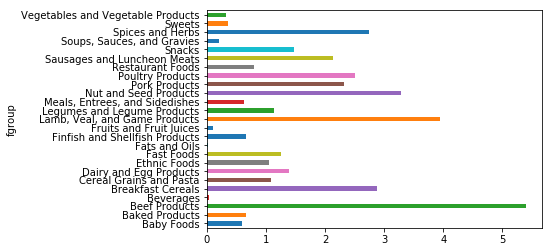

In [256]:
result['Zinc, Zn'].plot(kind='barh')

In [257]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [258]:
# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

max_foods.ix['Amino Acids']['food']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 